In [2]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn import tree
from sklearn import metrics
import graphviz
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ClassPredictionError, ClassBalance
sns.set(color_codes=True)
%matplotlib inline

# Pré-processamento de dados

## Carregar tabelas

In [3]:
if not os.path.exists("./data"):
    os.makedirs("./data")

caso_intoxicacao = pd.read_table("./data/01_caso_intoxicacao", sep="|", encoding='UTF-8', index_col="identificador_caso")
atendimento = pd.read_table("./data/02_atendimento", sep="|", encoding='UTF-8', index_col="identificador_caso")
solicitante = pd.read_table("./data/03_solicitante", sep="|", encoding='UTF-8', index_col="identificador_caso")
paciente = pd.read_table("./data/04_paciente", sep="|", encoding='UTF-8', index_col="identificador_caso")
exposicao = pd.read_table("./data/05_exposicao", sep="|", encoding='UTF-8', index_col="identificador_caso")
agente_intoxicante = pd.read_table("./data/06_agente_intoxicante", sep="|", encoding='UTF-8', index_col="identificador_caso")
manifestacao = pd.read_table("./data/07_manifestacao", sep="|", encoding='UTF-8', index_col="identificador_caso")
tratamento = pd.read_table("./data/08_tratamento", sep="|", encoding='UTF-8', index_col="identificador_caso")
exame = pd.read_table("./data/09_exame", sep="|", encoding='UTF-8', index_col="identificador_caso")
historia = pd.read_table("./data/10_historia", sep="|", encoding='UTF-8', index_col="identificador_caso")
acompanhamento = pd.read_table("./data/11_acompanhamento", sep="|", encoding='UTF-8', index_col="identificador_caso")
encerramento = pd.read_table("./data/12_encerramento", sep="|", encoding='UTF-8', index_col="identificador_caso")
informacao = pd.read_table("./data/13_informacao", sep="|", encoding='UTF-8', index_col="identificador_caso")
paciente_animal = pd.read_table("./data/14_paciente_animal", sep="|", encoding='UTF-8', index_col="identificador_caso")
banco_agentes_intoxicantes = pd.read_table("./data/99_banco_agentes_intoxicantes", sep="|", encoding='UTF-8')


C:\Users\Yamamoto\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Gerar relatórios gerais sobre os atributos

In [4]:
if not os.path.exists("./tmp"):
    os.makedirs("./tmp")
    
pp.ProfileReport(caso_intoxicacao).to_file(outputfile="./tmp/01_caso_intoxicacao.html")
pp.ProfileReport(atendimento).to_file(outputfile="./tmp/02_atendimento.html")
pp.ProfileReport(solicitante).to_file(outputfile="./tmp/03_solicitante.html")
pp.ProfileReport(paciente).to_file(outputfile="./tmp/04_paciente.html")
pp.ProfileReport(exposicao).to_file(outputfile="./tmp/05_exposicao.html")
pp.ProfileReport(agente_intoxicante).to_file(outputfile="./tmp/06_agente_intoxicante.html")
pp.ProfileReport(manifestacao).to_file(outputfile="./tmp/07_manifestacao.html")
pp.ProfileReport(tratamento).to_file(outputfile="./tmp/08_tratamento.html")
pp.ProfileReport(exame).to_file(outputfile="./tmp/09_exame.html")
pp.ProfileReport(historia).to_file(outputfile="./tmp/10_historia.html")
pp.ProfileReport(acompanhamento).to_file(outputfile="./tmp/11_acompanhamento.html")
pp.ProfileReport(encerramento).to_file(outputfile="./tmp/12_encerramento.html")
pp.ProfileReport(informacao).to_file(outputfile="./tmp/13_informacao.html")
pp.ProfileReport(paciente_animal).to_file(outputfile="./tmp/14_paciente_animal.html")
# pp.ProfileReport(banco_agentes_intoxicantes).to_file(outputfile="./tmp/99_banco_agentes_intoxicantes.html")


## Seleção manual de atributos

In [5]:
true = ['t']; false = ['f']

caso_intoxicacao = pd.read_table("./data/01_caso_intoxicacao", sep="|",
                                 encoding='UTF-8',
                                 index_col="identificador_caso",
                                 true_values=true, false_values=false,
                                 usecols=["identificador_caso", "classificacao_gravidade", "tipo_atendimento"])

atendimento = pd.read_table("./data/02_atendimento", sep="|",
                            encoding='UTF-8',
                            index_col="identificador_caso",
                            true_values=true, false_values=false,
                            usecols=["identificador_caso", "local_atendimento"])

solicitante = pd.read_table("./data/03_solicitante", sep="|",
                            encoding='UTF-8',
                            index_col="identificador_caso",
                            true_values=true, false_values=false,
                            usecols=["identificador_caso", "cidade_solicitacao", "estado_solicitacao"])

paciente = pd.read_table("./data/04_paciente", sep="|",
                         encoding='UTF-8',
                         index_col="identificador_caso",
                         true_values=true, false_values=false,
                         usecols=["identificador_caso", "idade", "especificacao_idade", "sexo", "data_nascimento"])      

exposicao = pd.read_table("./data/05_exposicao", sep="|",
                          encoding='UTF-8',
                          index_col="identificador_caso",
                          true_values=true, false_values=false,
                          usecols=["identificador_caso", "cidade_exposicao", "estado_exposicao"])

agente_intoxicante = pd.read_table("./data/06_agente_intoxicante", sep="|",
                                   encoding='UTF-8',
                                   index_col="identificador_caso",
                                   true_values=true, false_values=false,
                                   usecols=["identificador_caso", "grupo_agente"])          

#manifestacao = pd.read_table("./data/07_manifestacao", sep="|",
#                             encoding='UTF-8',
#                             index_col="identificador_caso",
#                             true_values=true, false_values=false,
#                             usecols=["identificador_caso"])                    

#tratamento = pd.read_table("./data/08_tratamento", sep="|",
#                           encoding='UTF-8',
#                           index_col="identificador_caso",
#                           true_values=true, false_values=false,
#                           usecols=["identificador_caso"])                    

#exame = pd.read_table("./data/09_exame", sep="|",
#                      encoding='UTF-8',
#                      index_col="identificador_caso",
#                      true_values=true, false_values=false,
#                      usecols=["identificador_caso"])                    

#historia = pd.read_table("./data/10_historia", sep="|",
#                         encoding='UTF-8',
#                         index_col="identificador_caso",
#                         true_values=true, false_values=false,
#                         usecols=["identificador_caso"])                    

#acompanhamento = pd.read_table("./data/11_acompanhamento", sep="|",
#                               encoding='UTF-8',
#                               index_col="identificador_caso",
#                               true_values=true, false_values=false,
#                               usecols=["identificador_caso"])                    

encerramento = pd.read_table("./data/12_encerramento", sep="|",
                             encoding='UTF-8',
                             index_col="identificador_caso",
                             true_values=true, false_values=false,
                             usecols=["identificador_caso", "desfecho"])                    

#informacao = pd.read_table("./data/13_informacao", sep="|",
#                           encoding='UTF-8',
#                           index_col="identificador_caso",
#                           true_values=true, false_values=false,
#                           usecols=["identificador_caso"])                    

#paciente_animal = pd.read_table("./data/14_paciente_animal", sep="|",
#                                encoding='UTF-8',
#                                index_col="identificador_caso",
#                                true_values=true, false_values=false,
#                                usecols=["identificador_caso"])                    

#banco_agentes_intoxicantes = pd.read_table("./data/99_banco_agentes_intoxicantes", sep="|",
#                                           encoding='UTF-8',
#                                           true_values=true, false_values=false)                    


## Junção das tabelas

In [6]:
data = (
    caso_intoxicacao
    .join(atendimento)
    .join(solicitante)
    .join(paciente)
    .join(exposicao)
    .join(agente_intoxicante)
    .join(encerramento)
)

# pp.ProfileReport(data).to_file(outputfile="./tmp/data.html")
data.count()

tipo_atendimento           75525
classificacao_gravidade    70654
local_atendimento          74434
cidade_solicitacao         74051
estado_solicitacao         74051
idade                      70257
especificacao_idade        71007
sexo                       71024
data_nascimento            58504
cidade_exposicao           69553
estado_exposicao           71662
grupo_agente               73903
desfecho                   71399
dtype: int64

## Limpeza de dados

### Remoção de missings e dados duplicados
Retirando-se todos os registros que contém algum valor nulo em qualquer dos atributos, reduzimos a tabela de 75525 para 46563 registros.

In [7]:
data_tmp1 = (
    data
    .drop_duplicates()
    .drop("data_nascimento", axis=1)
    .dropna()
)

# pp.ProfileReport(data_tmp1).to_file(outputfile="./tmp/data_no_missings.html")

### Remoção de casos fora de SC

In [8]:
data_tmp2 = data_tmp1[
                (data_tmp1.estado_solicitacao == 'SC') &
                (data_tmp1.estado_exposicao == 'SC')
            ]

### Remoção de sexo Ignorado ou Outro

In [9]:
data_tmp3 = data_tmp2[
                (data_tmp2.sexo == 'Feminino') |
                (data_tmp2.sexo == 'Masculino')
            ]

In [10]:
data_tmp4 = data_tmp3[
    (data_tmp3.desfecho == 'Manifestações Clínicas Leves') |
    (data_tmp3.desfecho == 'Diagnóstico Diferencial (confirmada a não exposição)') |
    (data_tmp3.desfecho == 'Sem Manifestações Clínicas (Assintomático)') |
    (data_tmp3.desfecho == 'Manifestações Clínicas Moderadas') |
    (data_tmp3.desfecho == 'Manifestações Clínicas Graves') |
    (data_tmp3.desfecho == 'Óbito') |
    (data_tmp3.desfecho == 'Manifestações Clínicas Graves com Sequelas')  
]

### Remoção de casos animais ou pedidos de informação

In [11]:
clean_data = (
    data_tmp4
    [data_tmp4.tipo_atendimento == 'H']
    .drop('tipo_atendimento', axis=1)
    .drop(['estado_solicitacao', 'estado_exposicao'], axis=1)
)

## pp.ProfileReport(clean_data).to_file(outputfile="./tmp/clean_data.html")
clean_data.count()

classificacao_gravidade    43480
local_atendimento          43480
cidade_solicitacao         43480
idade                      43480
especificacao_idade        43480
sexo                       43480
cidade_exposicao           43480
grupo_agente               43480
desfecho                   43480
dtype: int64

## Transformação de  Dados

### Atributo idade

In [12]:
clean_data['especificacao_idade'].value_counts()

Anos     42711
Meses      731
Dias        38
Name: especificacao_idade, dtype: int64

Transformação Meses e Dias para Anos

In [13]:
clean_data.loc[clean_data.especificacao_idade == 'Meses', 'idade'] /= 12
clean_data.loc[clean_data.especificacao_idade == 'Dias', 'idade'] /= 360

Discretização em faixas etárias

Bebê -> 0 a 3

Criança -> 3 a 15

Jovem -> 15 a 30

Adulto -> 30 a 60

Idoso -> 60 em diante

In [14]:
clean_data.loc[clean_data.idade < 3, 'classificacao_idade'] = 'Bebe'
clean_data.loc[(clean_data.idade >= 3) & (clean_data.idade < 15), 'classificacao_idade'] = 'Crianca'
clean_data.loc[(clean_data.idade >= 15) & (clean_data.idade < 30), 'classificacao_idade'] = 'Jovem'
clean_data.loc[(clean_data.idade >= 30) & (clean_data.idade < 60), 'classificacao_idade'] = 'Adulto'
clean_data.loc[clean_data.idade >= 60, 'classificacao_idade'] = 'Idoso'

In [15]:
clean_data.classificacao_idade.value_counts()

Adulto     17323
Jovem      11270
Crianca     6245
Bebe        5062
Idoso       3580
Name: classificacao_idade, dtype: int64

### Cidades para mesoregiões

In [16]:
def normalize_str(text):
    text = (
        unicodedata
        .normalize('NFKD', text)
        .encode('ascii', 'ignore')
        .decode("utf-8")
    )
    return str(text).upper()

municipios = (
    pd.read_csv("./municipiosSC.csv")
    .assign(municipio = lambda df: df['municipio'].apply(normalize_str))
    .assign(mesoregiao = lambda df: df['mesoregiao'].apply(normalize_str))
)
municipios_dict = {}
for index, row in municipios.iterrows():
    municipios_dict[row.municipio] = row.mesoregiao
    
    
clean_data = (
    clean_data
    .assign(mesoregiao=lambda df: df['cidade_solicitacao'].apply(normalize_str).replace(municipios_dict))
)
clean_data.mesoregiao.value_counts()

GRANDE FLORIANOPOLIS    11114
VALE DO ITAJAI           9158
OESTE CATARINENSE        8658
NORTE CATARINENSE        6548
SUL CATARINENSE          5760
SERRANA                  2242
Name: mesoregiao, dtype: int64

### Categórico para numérico


In [28]:
cat_to_num = {"classificacao_idade": {"Bebe": 0, "Crianca": 1, "Jovem": 2, "Adulto": 3, "Idoso": 4},
              "classificacao_gravidade": {"Leve": 0, "Moderada": 1, "Grave": 2},
              "grupo_agente": {"MEDICAMENTOS": 0, "ANIMAIS PEÇONHENTOS/VENENOSOS" : 1, "OUTROS" : 2, "AGROTÓXICOS" : 3,
                               "DROGAS DE ABUSO" : 4, "PRODUTOS QUÍMICOS RESIDENCIAIS OU INDUSTRIAIS" : 5,
                               "PRODUTOS DOMISSANITÁRIOS" : 6, "ANIMAIS NÃO PEÇONHENTOS/NÃO VENENOSOS" : 7,
                               "RATICIDAS" : 8, "PLANTAS E FUNGOS" : 9, "PRODUTOS DE USO VETERINÁRIO" : 10,
                               "INSETICIDAS DE USO DOMÉSTICO" : 11, "COSMÉTICOS E HIGIENE PESSOAL" : 12, 
                               "ALIMENTOS" : 13, "METAIS": 14},
             "sexo": {"Feminino": 0, "Masculino": 1},
             "local_atendimento": {'Hospital': 0, 'Unidade de Pronto Atendimento (UPA)': 1,
                                   'Unidade Básica de Saúde (UBS)': 2, 'Residência': 3,
                                    'Consultório/Clínica Particular': 6, 'CIAT/Ambulatório de Toxicologia': 5,
                                    'Outro': 6, 'Local de Trabalho': 6, 'SAMU': 6, 'Público': 6,
                                    'Unidade Móvel de Nível Pré-hospitalar Particular': 6, 'Farmácia': 6,
                                    'Escola/Creche': 6, 'Vigilância Epidemiológica': 6, 'CIAT (Outro)': 6,
                                    'E-mail': 6, 'Vigilância Sanitária': 6, 'Clínica Veterinária': 6, 'Busca Ativa': 6},
             "mesoregiao": {'GRANDE FLORIANOPOLIS': 0, 'VALE DO ITAJAI': 1, 'OESTE CATARINENSE': 2,
                            'NORTE CATARINENSE': 3, 'SUL CATARINENSE': 4, 'SERRANA': 5},
              "desfecho": {'Manifestações Clínicas Leves': 0, 'Diagnóstico Diferencial (confirmada a não exposição)': 2,
                           'Sem Manifestações Clínicas (Assintomático)': 0, 'Manifestações Clínicas Moderadas': 1,
                            'Manifestações Clínicas Graves': 1,
                            'Óbito': 1,'Manifestações Clínicas Graves com Sequelas': 1}
             }

final_data = (
    clean_data
    .replace(cat_to_num)
    .drop(['idade', 'especificacao_idade'], axis=1)
    .drop(['cidade_solicitacao', 'cidade_exposicao'], axis=1)
)

# pp.ProfileReport(final_data, check_correlation=False).to_file(outputfile="./tmp/final_prepared.html")

In [29]:
final_data.head()

,classificacao_gravidade,local_atendimento,sexo,grupo_agente,desfecho,classificacao_idade,mesoregiao
identificador_caso,,,,,,,
1,2,0,1,1,1,4,0
3,1,0,0,0,0,1,4
5,1,2,0,9,1,1,4
5,1,2,0,1,1,1,4
6,2,0,0,3,1,1,3


## Criação do Modelo de Classificação

In [37]:
features = ['classificacao_gravidade', 'local_atendimento', 'sexo', 'grupo_agente',
            'classificacao_idade', 'mesoregiao']
target = 'desfecho'
classes = ['Favorável', 'Desfavorável', 'Não Exposição']
locais = ['Hospital', 'Unidade de Pronto Atendimento (UPA)',
          'Unidade Básica de Saúde (UBS)', 'Residência',
          'CIAT/Ambulatório de Toxicologia', 'Outro']

### Separação Treino/Teste

In [31]:
x_train, x_test, y_train, y_test = train_test_split(
    final_data[features], final_data[target], test_size=0.3, random_state=1)

### Naive Bayes

In [32]:
bayes_model = naive_bayes.GaussianNB()
bayes_model.fit(x_train, y_train)
y_pred = bayes_model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7785955228457528

### Decision Tree

In [109]:
tree_model = tree.DecisionTreeClassifier(max_depth=10)
tree_model.fit(x_train, y_train)
tree_model.score(x_test, y_test)
y_pred = tree_model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.8958141674333027

In [34]:
dot_data = tree.export_graphviz(tree_model, out_file=None,
                                feature_names=features,  
                                class_names=classes,  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data) 
graph.render("CIATox") 

'CIATox.pdf'

## Avaliação e Visualização dos Resultados

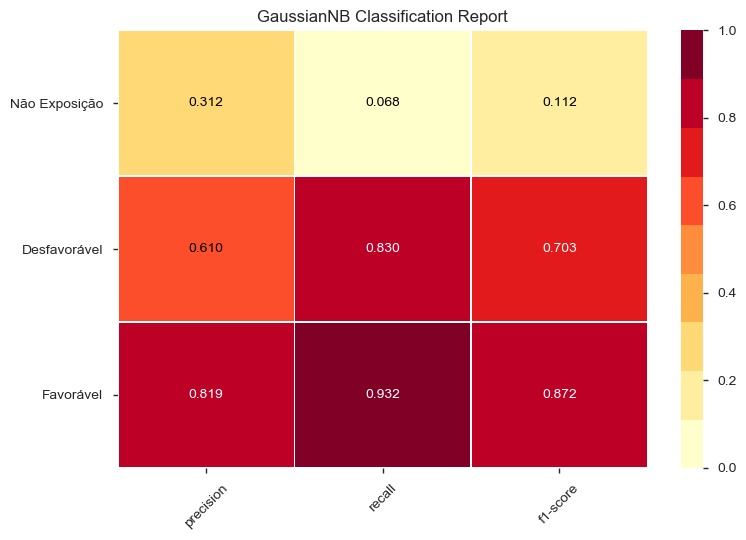

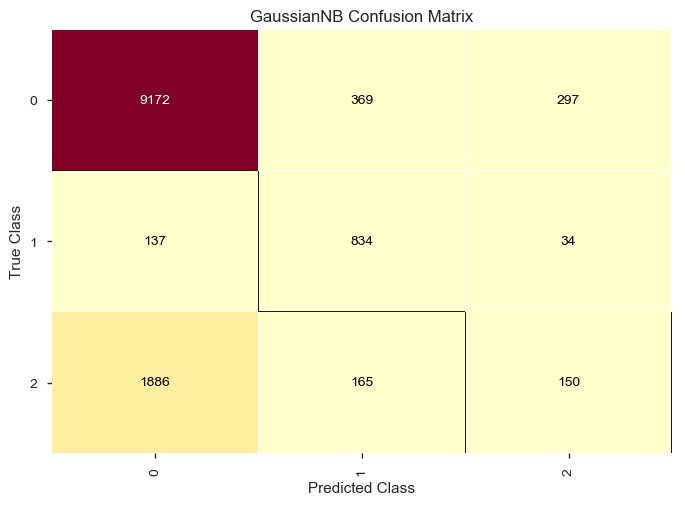

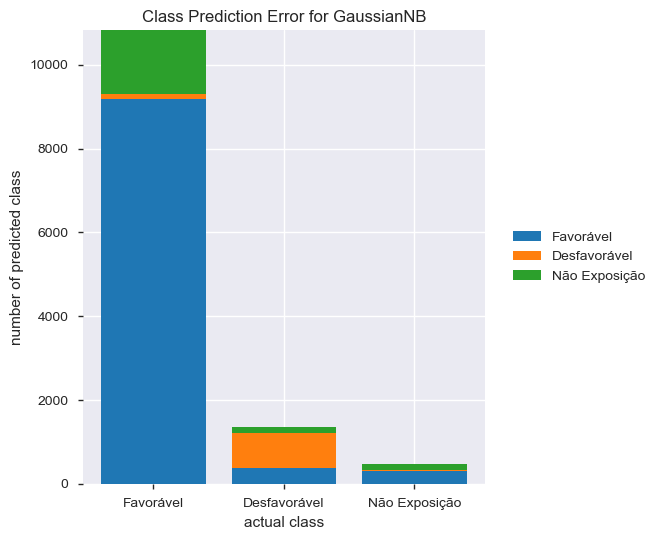

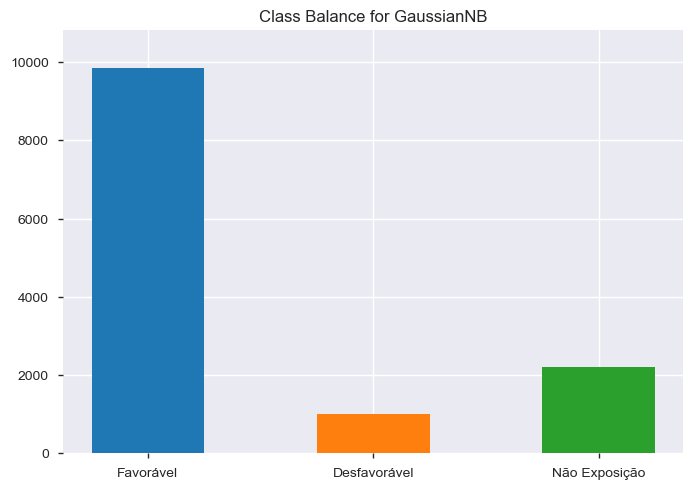

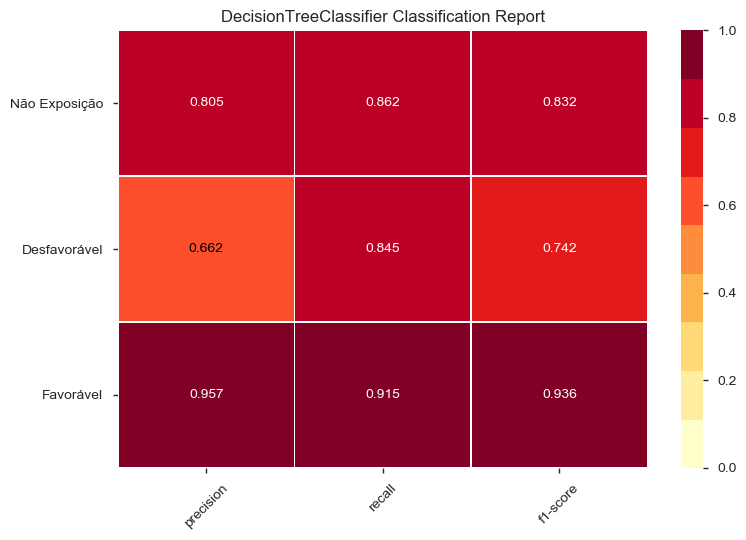

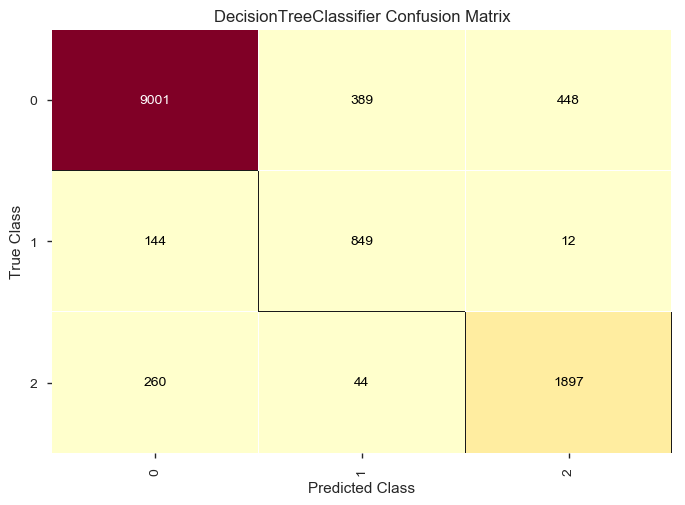

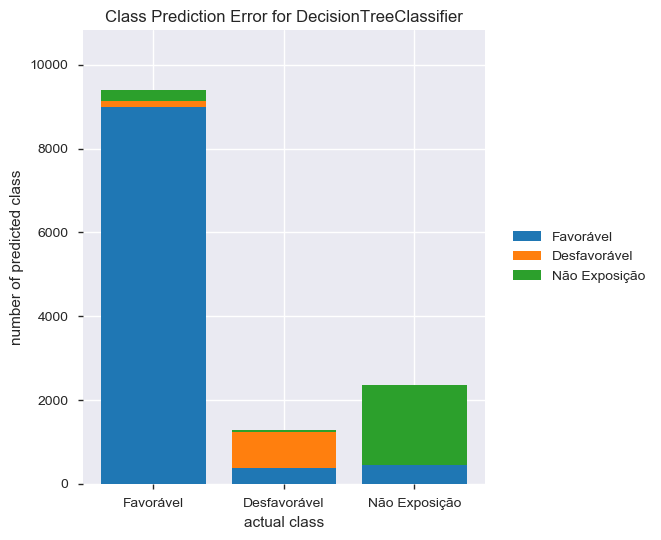

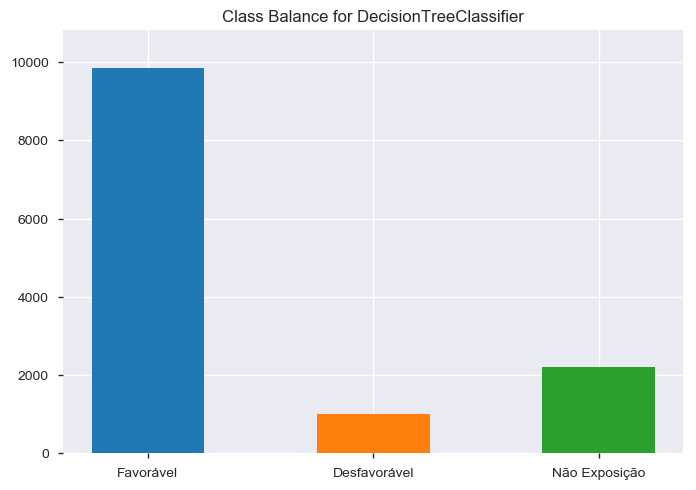

In [35]:
models = [bayes_model, tree_model]

for model in models:
    metrics_report = ClassificationReport(model, classes=classes)
    metrics_report.fit(x_train, y_train)
    metrics_report.score(x_test, y_test)
    metrics_report.poof()

    conf_matrix = ConfusionMatrix(model)
    conf_matrix.fit(x_train, y_train)
    conf_matrix.score(x_test, y_test)
    conf_matrix.poof()
    
    pred_error = ClassPredictionError(model, classes=classes)
    pred_error.fit(x_train, y_train)
    pred_error.score(x_test, y_test)
    pred_error.poof()

    class_balance = ClassBalance(model, classes=classes)
    class_balance.fit(x_train, y_train)
    class_balance.score(x_test, y_test)
    class_balance.poof()

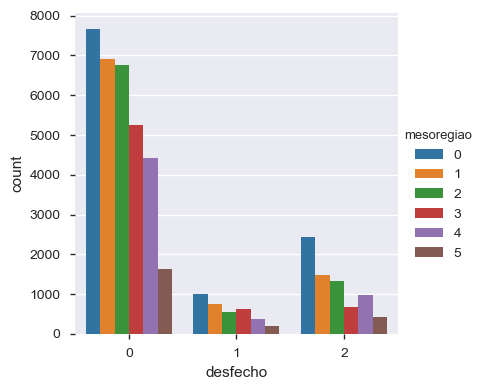

In [36]:
sns.factorplot(x="desfecho", data=final_data, hue="mesoregiao", kind="count")

In [171]:
y_pred_locais = np.zeros((len(locais), len(final_data)))
best_y = np.zeros(len(final_data))
for i in range(len(locais)):
    df = (
        final_data
        .assign(local_atendimento=i)
        .drop("desfecho", axis=1)
    )
    y_pred = tree_model.predict(df)
    y_pred_locais[i] = y_pred
    if i == 0:
        best_y = y_pred 
    else:
        a = y_pred_locais[i]
        b = y_pred_locais[i-1]
        best_y = np.where(b < a, b, a)


In [182]:
locais

['Hospital',
 'Unidade de Pronto Atendimento (UPA)',
 'Unidade Básica de Saúde (UBS)',
 'Residência',
 'CIAT/Ambulatório de Toxicologia',
 'Outro']

In [185]:
result = (
    final_data
    .assign(best_prediction=best_y.astype(int))
    .assign(pred_hospital=y_pred_locais[0].astype(int))
    .assign(pred_upa=y_pred_locais[1].astype(int).astype(int))
    .assign(pred_ubs=y_pred_locais[2].astype(int))
    .assign(pred_residencia=y_pred_locais[3].astype(int))
    .assign(pred_ciat=y_pred_locais[4].astype(int))
    .assign(pred_outro=y_pred_locais[5].astype(int))
    [["local_atendimento", "desfecho", "best_prediction",
     "pred_hospital", "pred_upa", "pred_ubs", "pred_residencia",
     "pred_ciat", "pred_outro"]]
)

In [186]:
different_results = result[result.desfecho != result.best_prediction]
different_results.head()

,local_atendimento,desfecho,best_prediction,pred_hospital,pred_upa,pred_ubs,pred_residencia,pred_ciat,pred_outro
identificador_caso,,,,,,,,,
5,2,1,0,1,1,0,0,0,0
18,0,1,0,1,1,1,1,0,0
26,0,1,0,1,1,1,1,0,0
37,0,0,2,2,2,2,2,2,2
45,0,1,0,1,1,0,0,0,0


In [174]:
result.desfecho.value_counts()

0    32680
2     7320
1     3480
Name: desfecho, dtype: int64

In [175]:
result.best_prediction.value_counts()

0    33487
2     7624
1     2369
Name: best_prediction, dtype: int64

In [177]:
different_results.local_atendimento.value_counts()

0    3867
1     703
2     309
3     265
6     122
5      32
Name: local_atendimento, dtype: int64

In [215]:
clean_data.iloc[3]

classificacao_gravidade                            Moderada
local_atendimento             Unidade Básica de Saúde (UBS)
cidade_solicitacao                                  SOMBRIO
idade                                                    12
especificacao_idade                                    Anos
sexo                                               Feminino
cidade_exposicao                                    SOMBRIO
grupo_agente                  ANIMAIS PEÇONHENTOS/VENENOSOS
desfecho                   Manifestações Clínicas Moderadas
classificacao_idade                                 Crianca
mesoregiao                                  SUL CATARINENSE
Name: 5, dtype: object

In [214]:
result.iloc[3]

local_atendimento    2
desfecho             1
best_prediction      1
pred_hospital        0
pred_upa             1
pred_ubs             1
pred_residencia      1
pred_ciat            1
pred_outro           1
Name: 5, dtype: int64